In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Define the path to your MLassignment3 folder
path_to_ml_assignment = '/content/drive/MyDrive/MLassignment3'

# Check if the directory exists
if os.path.exists(path_to_ml_assignment):
    # List all files and directories in the specified path
    files_in_folder = os.listdir(path_to_ml_assignment)
    print(f"Files in '{path_to_ml_assignment}':")
    for item in files_in_folder:
        print(item)
else:
    print(f"Error: The directory '{path_to_ml_assignment}' does not exist. Please check the path and ensure your Google Drive is mounted correctly.")

Files in '/content/drive/MyDrive/MLassignment3':
sample_submission.csv
test.csv
train.csv
train
test


In [3]:
# Define the paths to the train and test folders
path_to_train_folder = os.path.join(path_to_ml_assignment, 'train')
path_to_test_folder = os.path.join(path_to_ml_assignment, 'test')

# Function to list files in a directory
def list_files_in_directory(directory_path):
    if os.path.exists(directory_path):
        print(f"\nFiles in '{directory_path}':")
        files = os.listdir(directory_path)
        # Print only the first few files to avoid overwhelming output
        for i, item in enumerate(files):
            if i < 10: # Displaying up to 10 files
                print(item)
            else:
                print(f"... and {len(files) - 10} more files.")
                break
        if not files:
            print("No files found.")
    else:
        print(f"Error: The directory '{directory_path}' does not exist.")

# List files in the train folder
list_files_in_directory(path_to_train_folder)

# List files in the test folder
list_files_in_directory(path_to_test_folder)


Files in '/content/drive/MyDrive/MLassignment3/train':
train

Files in '/content/drive/MyDrive/MLassignment3/test':
test


In [4]:
import os

# Correct the path to the actual image directory within the train folder
path_to_nested_train_images = os.path.join(path_to_train_folder, 'train')

# List files in the corrected train image folder
def list_files_in_directory_full(directory_path):
    if os.path.exists(directory_path):
        print(f"\nFiles in '{directory_path}':")
        files = os.listdir(directory_path)
        if files:
            for i, item in enumerate(files):
                if i < 10: # Displaying up to 10 files
                    print(item)
                else:
                    print(f"... and {len(files) - 10} more files.")
                    break
        else:
            print("No files found.")
    else:
        print(f"Error: The directory '{directory_path}' does not exist. Please check the path.")

list_files_in_directory_full(path_to_nested_train_images)


Files in '/content/drive/MyDrive/MLassignment3/train/train':
vqh.jpg
vbp.jpg
vxk.jpg
vxm.jpg
vju.jpg
vtf.jpg
vml.jpg
vdf.jpg
vsg.jpg
vma.jpg
... and 5301 more files.


In [5]:
import pandas as pd
import os

# Define the path to your MLassignment3 folder (assuming it's already mounted)
path_to_ml_assignment = '/content/drive/MyDrive/MLassignment3'

# Define the path to train.csv
train_csv_path = os.path.join(path_to_ml_assignment, 'train.csv')

# Load the train.csv file
try:
    train_df = pd.read_csv(train_csv_path)
    print(f"'{train_csv_path}' file successfully loaded.")
    # Display the first few rows of the DataFrame
    print("\nDataFrame head:")
    display(train_df.head())

    # Display basic information about the DataFrame
    print("\nDataFrame info:")
    train_df.info()
except FileNotFoundError:
    print(f"Error: '{train_csv_path}' not found. Please check the path.")
except Exception as e:
    print(f"Error occurred while loading the file: {e}")

'/content/drive/MyDrive/MLassignment3/train.csv' file successfully loaded.

DataFrame head:


,id,artist
0,dxi,Diego Velazquez
1,lxu,Vincent van Gogh
2,edc,Claude Monet
3,bis,Edgar Degas
4,jly,Hieronymus Bosch



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5311 non-null   object
 1   artist  5311 non-null   object
dtypes: object(2)
memory usage: 83.1+ KB


In [6]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from collections import Counter

path_to_ml_assignment = '/content/drive/MyDrive/MLassignment3'
path_to_nested_train_images = os.path.join(path_to_ml_assignment, 'train', 'train')
path_to_nested_test_images = os.path.join(path_to_ml_assignment, 'test', 'test')

In [7]:
#런타임 재활용시 avg, std 불러오기
import wandb
wandb.login()

import torch
import wandb
import json

# 방법 B: Artifact 사용 (추천 - 가장 확실함)
run = wandb.init(project="kaggle-artist-classification", job_type="training")
artifact = run.use_artifact('dataset-stats:latest') # 최신 버전 가져오기
artifact_dir = artifact.download()

with open(os.path.join(artifact_dir, "stats.json"), "r") as f:
    stats = json.load(f)

calculated_mean = torch.tensor(stats['mean'])
calculated_std = torch.tensor(stats['std'])

print(f"✅ Loaded stats from WandB: Mean={calculated_mean}, Std={calculated_std}")

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jwkim628 (jwkim628-hanyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  


✅ Loaded stats from WandB: Mean=tensor([0.5027, 0.4420, 0.3677]), Std=tensor([0.2103, 0.1947, 0.1761])


In [8]:
#When reallocate the runtime
from torch.utils.data import Dataset, Subset
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.img_labels = dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.has_labels = 'artist' in dataframe.columns

        if self.has_labels:
            self.classes = sorted(self.img_labels['artist'].unique())
            self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        else:
            self.classes = []
            self.class_to_idx = {}

        self.samples = []
        for idx, row in self.img_labels.iterrows():
            img_name = row['id'] + '.jpg'
            img_path = os.path.join(self.img_dir, img_name)
            if os.path.exists(img_path):
                label_idx = -1
                if self.has_labels:
                    label_name = row['artist']
                    label_idx = self.class_to_idx[label_name]
                self.samples.append((img_path, label_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# --- Re-establish necessary variables from previous cells --- #

# Path definitions (from w-dN0gPvs3NG)
path_to_ml_assignment = '/content/drive/MyDrive/MLassignment3'
path_to_nested_train_images = os.path.join(path_to_ml_assignment, 'train', 'train')
path_to_nested_test_images = os.path.join(path_to_ml_assignment, 'test', 'test')

# Load train_df (from q-u3kOSgsz0v)
train_csv_path = os.path.join(path_to_ml_assignment, 'train.csv')
train_df = pd.read_csv(train_csv_path)

# Load test_df (from eRxnPZfTtPVG)
test_csv_path = os.path.join(path_to_ml_assignment, 'test.csv')
test_df = pd.read_csv(test_csv_path)

# Load calculated_mean and calculated_std (from AciOTg5CtHw7 and eRxnPZfTtPVG)
# Assuming 'calculated_mean' and 'calculated_std' were already loaded via wandb
# If wandb.init() was interrupted, these might need to be reloaded.
# For robustness, we can hardcode them if they were successfully printed in 'AciOTg5CtHw7'.
# From the output of AciOTg5CtHw7:

# Define final transforms using the calculated mean and std (from eRxnPZfTtPVG)
final_train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=calculated_mean, std=calculated_std)
])

final_test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=calculated_mean, std=calculated_std)
])

# Create actual train and test datasets (from eRxnPZfTtPVG)
train_dataset = CustomImageDataset(
    dataframe=train_df,
    img_dir=path_to_nested_train_images,
    transform=final_train_transforms
)

test_dataset = CustomImageDataset(
    dataframe=test_df,
    img_dir=path_to_nested_test_images,
    transform=final_test_transforms
)

# --- Re-create train_subset and val_subset (from soBOvkm_tgwi) --- #
seed = 42
val_ratio = 0.1

torch.manual_seed(seed)

labels_full_dataset = torch.tensor([s[1] for s in train_dataset.samples], dtype=torch.long)
unique_classes = torch.unique(labels_full_dataset)

train_idx = torch.tensor([], dtype=torch.long)
val_idx = torch.tensor([], dtype=torch.long)

for c in unique_classes:
    c_idx = (labels_full_dataset == c).nonzero(as_tuple=True)[0]
    perm = torch.randperm(len(c_idx))
    n_val = max(1, int(len(c_idx) * val_ratio))
    val_idx = torch.cat([val_idx, c_idx[perm[:n_val]]])
    train_idx = torch.cat([train_idx, c_idx[perm[n_val:]]])

train_subset = Subset(train_dataset, train_idx)
val_subset = Subset(train_dataset, val_idx)

print(f"Original Train Dataset Size: {len(train_dataset)}")
print(f"Train Subset Size: {len(train_subset)}")
print(f"Validation Subset Size: {len(val_subset)}")

# --- Optimize DataLoaders with num_workers --- #

# Weighted Random Sampler
# Now using labels from train_subset
labels_train_subset = torch.tensor([train_subset.dataset.samples[i][1] for i in train_subset.indices], dtype=torch.long)
class_counts = Counter(labels_train_subset.tolist())
sample_weights = [1.0 / class_counts[int(l)] for l in labels_train_subset]
weighted_sampler = torch.utils.data.WeightedRandomSampler(sample_weights, len(sample_weights))

# Modify num_workers to use all available CPU cores
num_workers_value = os.cpu_count()
print(f"Using {num_workers_value} workers for DataLoader.")

BATCH_SIZE = 32 # Assuming BATCH_SIZE is 32 as in eRxnPZfTtPVG

train_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, sampler=weighted_sampler, num_workers=num_workers_value, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers_value, pin_memory=True)

print(f"Train DataLoader (with weighted sampler) has {len(train_loader)} batches.")
print(f"Validation DataLoader has {len(val_loader)} batches.")

Original Train Dataset Size: 5311
Train Subset Size: 4801
Validation Subset Size: 510
Using 12 workers for DataLoader.
Train DataLoader (with weighted sampler) has 151 batches.
Validation DataLoader has 16 batches.


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import wandb

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):

        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels,
            out_channels,
            kernel_size=3,
            stride=stride,
            padding=1,
            bias=False
        )
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(
            out_channels,
            out_channels,
            kernel_size=3,
            stride=1,
            padding=1,
            bias=False
        )
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace=True)

        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out



class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, 7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 2, stride=1)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(512, num_classes)
        self._init_weights()

    def _make_layer(self, out_channels, blocks, stride):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(nn.Conv2d(self.in_channels, out_channels, 1, stride=stride, bias=False),
                                       nn.BatchNorm2d(out_channels))
        layers = [BasicBlock(self.in_channels, out_channels, stride, downsample)]
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(self.in_channels, out_channels))
        return nn.Sequential(*layers)

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.conv1(x); x = self.bn1(x); x = self.relu(x); x = self.maxpool(x)
        x = self.layer1(x); x = self.layer2(x); x = self.layer3(x); x = self.layer4(x)
        x = self.avgpool(x); x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

def custom_macro_f1(y_true, y_pred, num_classes):
    f1s = []
    for c in range(num_classes):
        tp = ((y_pred==c)&(y_true==c)).sum().item()
        fp = ((y_pred==c)&(y_true!=c)).sum().item()
        fn = ((y_pred!=c)&(y_true==c)).sum().item()
        precision = tp/(tp+fp) if tp+fp>0 else 0
        recall   = tp/(tp+fn) if tp+fn>0 else 0
        f1 = (2*precision*recall)/(precision+recall) if precision+recall>0 else 0
        f1s.append(f1)
    return sum(f1s)/len(f1s)

def mixup_data(x, y, alpha=0.2):
    lam = torch.distributions.Beta(alpha, alpha).sample().item()
    batch_size = x.size()[0]
    index = torch.randperm(batch_size)
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Ensure device is correctly set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 50 # Assuming num_classes is 50 as established earlier

model = CustomResNet18(num_classes=num_classes).to(device)
criterion = FocalLoss(alpha=0.25, gamma=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50) # T_max should match num_epochs

num_epochs = 100

best_macro_f1 = 0
best_state_dict = None

print("Starting model training...")

for epoch in range(num_epochs):
    model.train()
    trn_loss, trn_correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        if torch.rand(1).item() < 0.25:
            images, y_a, y_b, lam = mixup_data(images, labels)
            outputs = model(images)
            loss = mixup_criterion(criterion, outputs, y_a, y_b, lam)
        else:
            outputs = model(images)
            loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        trn_loss += loss.item() * images.size(0)

        # For training accuracy, calculate based on predicted class
        _, predicted = outputs.max(1)
        trn_correct += predicted.eq(labels).sum().item()
        total += images.size(0)

    trn_acc = trn_correct / total
    scheduler.step()

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    val_outputs, val_targets = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            # For validation accuracy and F1, calculate based on predicted class
            _, predicted = outputs.max(1)
            val_correct += predicted.eq(labels).sum().item()
            val_total += images.size(0)
            val_outputs.append(predicted.cpu())
            val_targets.append(labels.cpu())

    val_acc = val_correct / val_total
    val_outputs = torch.cat(val_outputs)
    val_targets = torch.cat(val_targets)

    val_macro_f1 = custom_macro_f1(val_targets, val_outputs, num_classes=num_classes)

    print(f"Epoch {epoch+1:02d}: train loss {trn_loss / total:.4f}, acc {trn_acc:.4f}; "
          f"val loss {val_loss / val_total:.4f}, acc {val_acc:.4f}, macro F1 {val_macro_f1:.4f}")

    if val_macro_f1 > best_macro_f1:
        best_macro_f1 = val_macro_f1
        best_state_dict = model.state_dict()
        print(f"  -> Best Macro F1 updated: {best_macro_f1:.4f}")

if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    print(f"Loaded best model with Macro F1: {best_macro_f1:.4f}")

print("Finished!")

Starting model training...
Epoch 01: train loss 0.8525, acc 0.0881; val loss 0.8747, acc 0.0784, macro F1 0.0420
  -> Best Macro F1 updated: 0.0420
Epoch 02: train loss 0.7481, acc 0.1329; val loss 0.7908, acc 0.1431, macro F1 0.1167
  -> Best Macro F1 updated: 0.1167
Epoch 03: train loss 0.7010, acc 0.1693; val loss 0.8731, acc 0.1333, macro F1 0.0944
Epoch 04: train loss 0.6643, acc 0.1866; val loss 0.7393, acc 0.1294, macro F1 0.1103
Epoch 05: train loss 0.6349, acc 0.2016; val loss 0.7152, acc 0.1843, macro F1 0.1681
  -> Best Macro F1 updated: 0.1681
Epoch 06: train loss 0.6008, acc 0.2333; val loss 0.7043, acc 0.1725, macro F1 0.1615
Epoch 07: train loss 0.5757, acc 0.2560; val loss 0.6957, acc 0.2294, macro F1 0.1935
  -> Best Macro F1 updated: 0.1935
Epoch 08: train loss 0.5696, acc 0.2604; val loss 0.5957, acc 0.2882, macro F1 0.2368
  -> Best Macro F1 updated: 0.2368
Epoch 09: train loss 0.5133, acc 0.2995; val loss 0.6233, acc 0.2667, macro F1 0.2386
  -> Best Macro F1 updat

In [11]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import pandas as pd

# CustomImageDataset 클래스 재정의 (test set에서 img_id 반환하도록 수정)
class CustomImageDataset_V2(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.img_labels = dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.has_labels = 'artist' in dataframe.columns # 'artist' 컬럼 존재 여부 확인

        if self.has_labels:
            self.classes = sorted(self.img_labels['artist'].unique())
            self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        else:
            self.classes = []
            self.class_to_idx = {}

        self.samples = []
        for idx, row in self.img_labels.iterrows():
            img_name = row['id'] + '.jpg'
            img_path = os.path.join(self.img_dir, img_name)

            if os.path.exists(img_path):
                if self.has_labels:
                    label_name = row['artist']
                    label_idx = self.class_to_idx[label_name]
                    self.samples.append((img_path, label_idx)) # 학습/검증 시: 이미지 경로, 라벨 인덱스
                else:
                    self.samples.append((img_path, row['id'])) # 테스트 시: 이미지 경로, 원본 이미지 ID

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, target # 이미지와 라벨 인덱스 또는 이미지 ID 반환

print("CustomImageDataset_V2 정의 완료")


CustomImageDataset_V2 정의 완료


In [12]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import pandas as pd

# 재정의된 CustomImageDataset_V2를 사용하여 test_dataset과 test_loader 재초기화

# `final_test_transforms`와 `path_to_nested_test_images`는 이전 셀에서 정의된 것을 사용합니다.
# `test_df`도 이전 셀에서 이미 로드되어 있다고 가정합니다.

test_dataset_v2 = CustomImageDataset_V2(
    dataframe=test_df,
    img_dir=path_to_nested_test_images,
    transform=final_test_transforms
)

# BATCH_SIZE와 num_workers_value는 이전 셀에서 정의된 것을 사용합니다.
# test_loader_v2에 num_workers를 적용하여 이미지 로딩 속도 개선
test_loader_v2 = DataLoader(test_dataset_v2, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers_value, pin_memory=True)

print(f"Test dataset (V2) size: {len(test_dataset_v2)} images")
print(f"Test DataLoader (V2) has {len(test_loader_v2)} batches.")

Test dataset (V2) size: 600 images
Test DataLoader (V2) has 19 batches.


In [13]:
import pandas as pd

model.eval()

all_img_ids = []
all_pred_labels = []

with torch.no_grad():
    for images, img_ids_batch in test_loader_v2:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(1).cpu().numpy()

        all_pred_labels.extend(preds)
        all_img_ids.extend(img_ids_batch)


pred_artists = [train_dataset.classes[i] for i in all_pred_labels]

submission = pd.DataFrame({'id': all_img_ids, 'artist': pred_artists})
submission.to_csv('submission.csv', index=False)

print("Submission.csv 파일이 성공적으로 생성되었습니다!")
print("생성된 submission.csv의 첫 5행:")
display(submission.head())


Submission.csv 파일이 성공적으로 생성되었습니다!
생성된 submission.csv의 첫 5행:


,id,artist
0,pyz,Andy Warhol
1,vqn,Paul Klee
2,cqk,Francisco Goya
3,ubj,Francisco Goya
4,tfs,Pablo Picasso


In [14]:
from google.colab import files

try:
    files.download('submission.csv')
    print("submission.csv 파일 다운로드가 시작되었습니다!")
except FileNotFoundError:
    print("Error: submission.csv 파일을 찾을 수 없습니다. 파일이 올바르게 생성되었는지 확인해주세요.")
except Exception as e:
    print(f"파일 다운로드 중 오류가 발생했습니다: {e}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

submission.csv 파일 다운로드가 시작되었습니다!


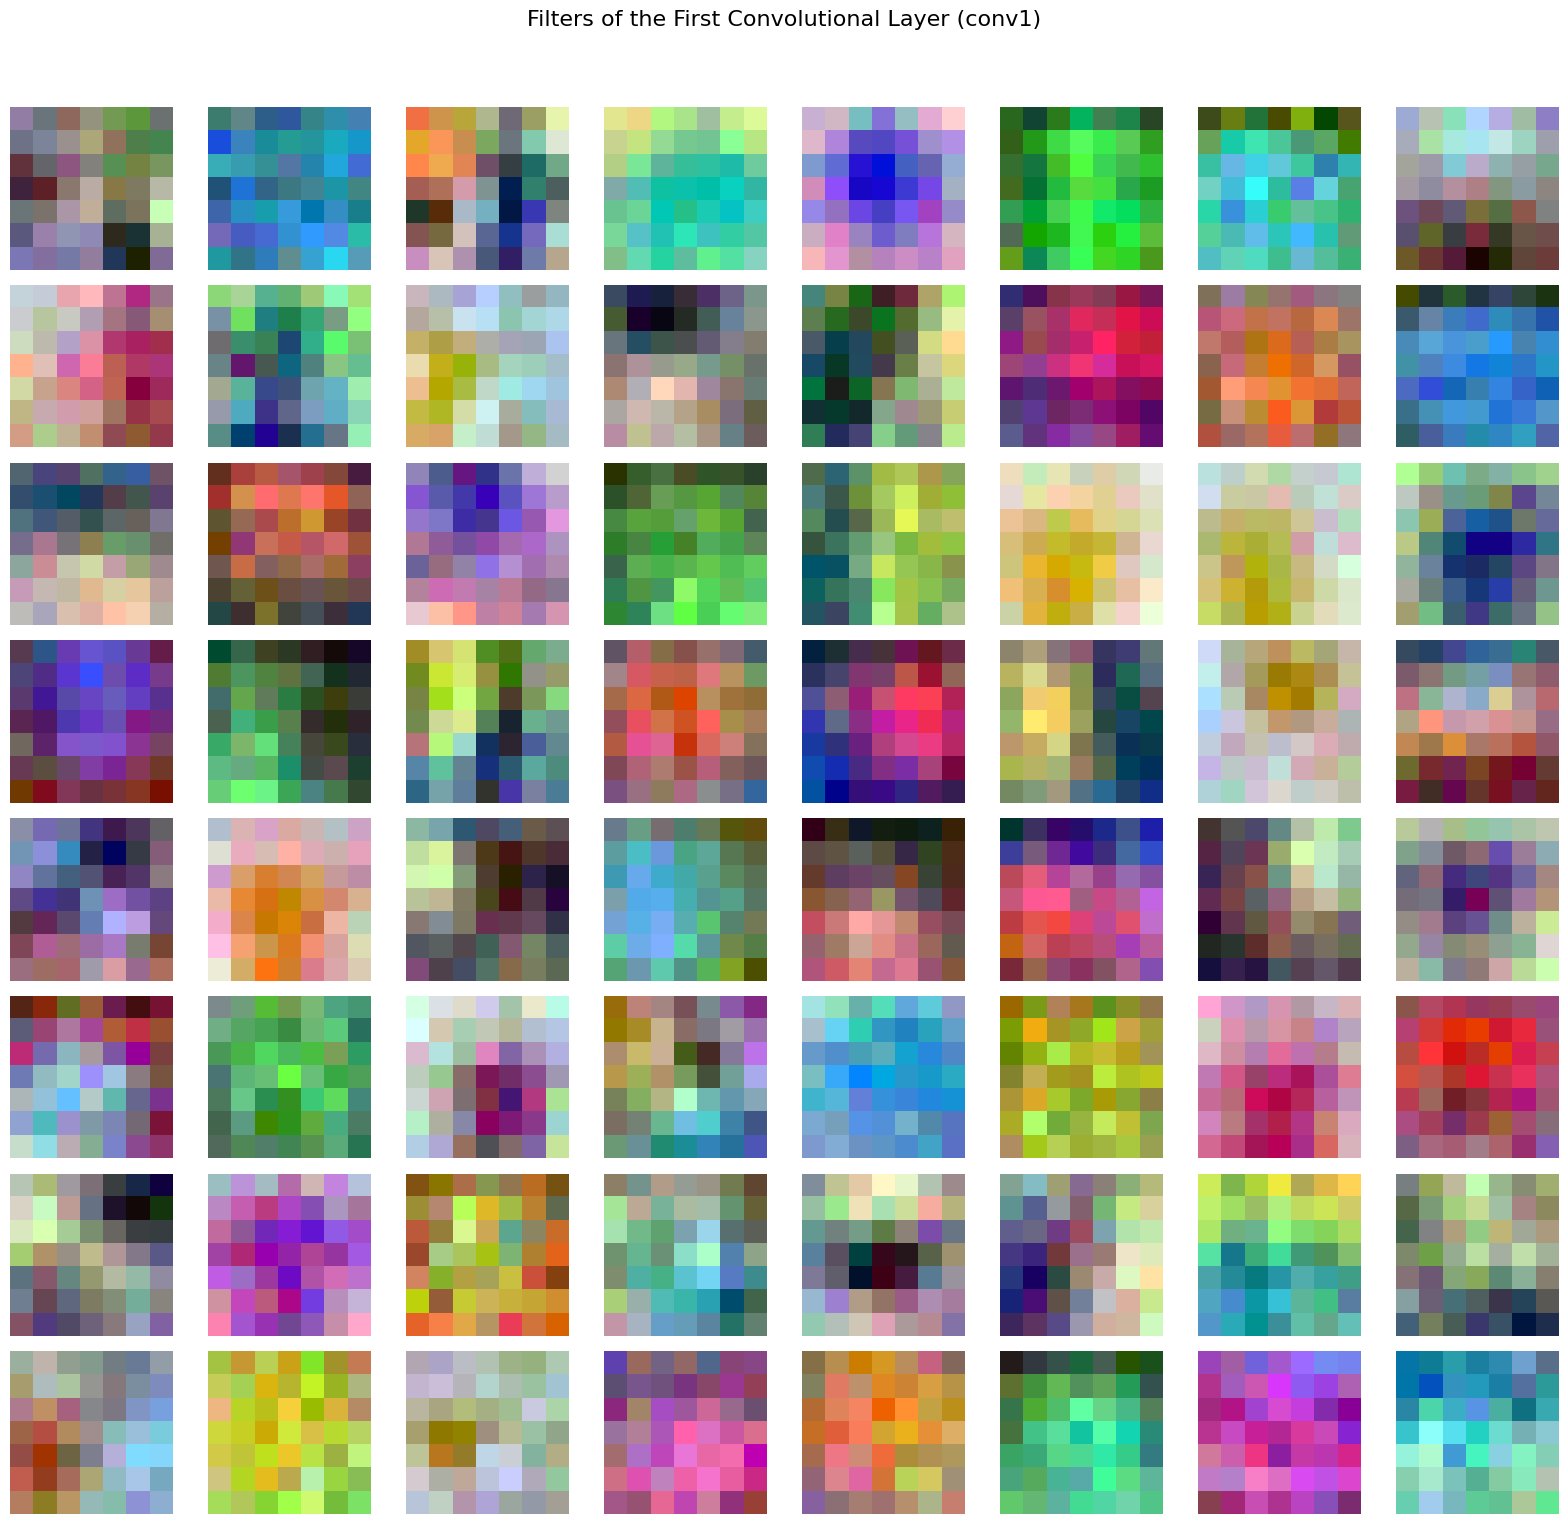

CustomResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 6

In [15]:
# Model's Filter Visualization
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

model_cpu = model.to('cpu')

filters = model_cpu.conv1.weight.data.clone()

num_filters = filters.shape[0]

normalized_filters = torch.zeros_like(filters)
for i in range(num_filters):
    f = filters[i]
    f_min = f.min()
    f_max = f.max()
    if f_max - f_min > 0:
        normalized_filters[i] = (f - f_min) / (f_max - f_min)
    else:
        normalized_filters[i] = f - f_min

rows = int(np.ceil(np.sqrt(num_filters)))
cols = int(np.ceil(num_filters / rows))

plt.figure(figsize=(cols*2, rows*2))

for i in range(num_filters):
    plt.subplot(rows, cols, i + 1)

    filter_to_show = normalized_filters[i].permute(1, 2, 0).numpy()
    plt.imshow(filter_to_show)
    plt.axis('off')

plt.suptitle('Filters of the First Convolutional Layer (conv1)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

model.to(device)
